In [1]:
# Nice to have and only here as a reference until moved to its instructional home :)
#export CUDNN_PATH=$(dirname $(python -c "import nvidia.cudnn; print(nvidia.cudnn.__file__)"))
#export SITE_PACKAGES_PATH=$(python -c "import site; print(site.getsitepackages()[0])")
#export LD_LIBRARY_PATH=$CUDNN_PATH/lib:$SITE_PACKAGES_PATH/tensorrt_libs/:$LD_LIBRARY_PATH

In [2]:
!conda list

# packages in environment at /home/flaniganp/mambaforge/envs/tensorflow-exercise-2:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                       2_gnu    conda-forge
absl-py                   2.1.0                    pypi_0    pypi
anyio                     4.3.0                    pypi_0    pypi
argon2-cffi               23.1.0                   pypi_0    pypi
argon2-cffi-bindings      21.2.0                   pypi_0    pypi
arrow                     1.3.0                    pypi_0    pypi
asttokens                 2.4.1                    pypi_0    pypi
async-lru                 2.0.4                    pypi_0    pypi
attrs                     23.2.0                   pypi_0    pypi
babel                     2.14.0                   pypi_0    pypi
beautifulsoup4            4.12.3                   pypi_0    pypi
bleach                    6.1.0          

In [31]:
# German Traffic Sign Recognition Benchmark GTSRB
# https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/published-archive.html

# * keras.layers: This component of Keras provides a wide array of layers for building neural networks, including
#   convolutional layers, pooling layers, dense (fully connected) layers, and more. These layers are the building blocks
#   of neural networks and can be stacked to create complex architectures tailored to specific machine learning tasks.
from keras import layers
# * keras.models: This module in Keras is essential for creating neural network models. It includes classes like
#   Sequential and the Functional API for building models. The Sequential model is straightforward, allowing layers to
#   be added in sequence, suitable for simple architectures. The Functional API, on the other hand, provides greater
#   flexibility for creating complex models with advanced features like shared layers and multiple inputs/outputs.
#   Both types enable comprehensive model management, including training, evaluation, and saving/loading
#   functionalities, making them versatile for a wide range of deep learning applications.
from keras import models
# * keras.callbacks: The keras.callbacks module offers a set of tools that can be applied during the training process of
#   a model. These callbacks are used for various purposes like monitoring the model's performance in real-time, saving
#   the model at certain intervals, early stopping when the performance plateaus, adjusting learning rates, and more.
#   They are crucial for enhancing and controlling the training process, allowing for automated and optimized model
#   training. Callbacks like ModelCheckpoint, EarlyStopping, TensorBoard, and ReduceLROnPlateau are commonly used for
#   efficient model training and fine-tuning.
from keras.callbacks import EarlyStopping, ModelCheckpoint

# The 'matplotlib.pyplot' is a collection of functions in the 'matplotlib' library that make matplotlib work like MATLAB.
# Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure,
# plots some lines in a plotting area, decorates the plot with labels, etc. 'plt' is a commonly used shorthand alias
# for 'matplotlib.pyplot'. This allows you to access matplotlib's plotting functions with shorter syntax - for example,
# you can type 'plt.plot()' instead of 'matplotlib.pyplot.plot()'. This import is essential for data visualization,
# allowing you to create a wide variety of static, animated, and interactive plots and charts in Python.
import matplotlib.pyplot as plt

# NumPy (Numerical Python) is an essential library for scientific computing in Python. It provides support for large,
# multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.
# With NumPy, you can perform complex mathematical operations on large amounts of data with ease and efficiency. It's
# widely used in data analysis, machine learning, and engineering for its speed and versatility. Importing it as 'np'
# is a common convention, making the code more readable and easier to write for the Python community.
import numpy as np

# The os module in Python provides a way of using operating system dependent functionality. It allows you to interface
# with the underlying operating system that Python is running on – be it Windows, Mac or Linux. You can use the os module
# to handle file and directory paths, create folders, list contents of a directory, manage environment variables, execute
# shell commands, and more.
import os

# Regular Expressions
# 1. search: This function is used to perform a search for a pattern in a string and returns a match object if the
# pattern is found, otherwise None. It's particularly useful for string pattern matching and extracting specific
# segments from text.
from re import search

# Key aspects of 'check_output':
# 1. **Process Execution**: The 'check_output' function is used to run a command in the subprocess/external process and
#    capture its output. This is especially useful for running system commands and capturing their output directly
#    within a Python script.
# 2. **Return Output**: It returns the output of the command, making it available to the Python environment. If the
#    called command results in an error (non-zero exit status), it raises a CalledProcessError.
# 3. **Use Cases**: Common use cases include executing a shell command, reading the output of a command, automating
#    scripts that interact with the command line, and integrating external tools into a Python workflow.
# Example Usage:
# Suppose you want to capture the output of the 'ls' command in a Unix/Linux system. You can use 'check_output' like
# this:
# output = check_output(['ls', '-l'])
from subprocess import check_output
# Key aspects of 'CalledProcessError':
#  1. Error Handling: CalledProcessError is an exception raised by check_output when the command it tries to execute
#   returns a non-zero exit status, indicating failure. This exception is particularly useful for error handling in
#   scripts where the success of an external command is crucial.
#  2. Exception Details: The exception object contains information about the error, including the return code, command
#  executed, and output (if any). This aids in debugging by providing clear insights into why the external command
#  failed.
#  3. Handling the Exception: In practical use, it is often caught in a try-except block, allowing the script to respond
#  appropriately to the failure of the external command, like logging the error or trying a fallback operation.
from subprocess import CalledProcessError

# TensorFlow is an open-source machine learning library developed by Google. It's used for both research and production
# at Google.
# * cast: This function is used to change the data type of tensor. For example, it can convert a tensor from one type
#   (like int32) to another (like float32). This is particularly useful in scenarios where you need to ensure
#   consistency in data types for computational operations in TensorFlow.
from tensorflow import cast as tf_cast
# * data: Is primarily used for data preprocessing and pipeline building. It offers tools for
#   reading and writing data in various formats, transforming it, and making it ready for machine learning models.
#   Efficient data handling is crucial in machine learning workflows, and TensorFlow's data module simplifies this
#   process significantly.
from tensorflow import data
# * float32: A data type in TensorFlow, representing a 32-bit floating-point number. It's widely used in machine
#   learning as it provides a good balance between precision and computational efficiency. float32 is often the default
#   data type for TensorFlow's neural network weights and other floating-point computations.
from tensorflow import float32
# * image: This submodule of TensorFlow (`tensorflow.image`) provides a collection of functions for image processing 
#   and manipulation. These functions include operations for resizing, cropping, flipping, and color adjustments on images. 
#   This is crucial in preparing images for input into neural network models and for augmenting image data to improve 
#   model robustness through increased dataset diversity. For example, it can be used to adjust the brightness of images, 
#   or to normalize pixel values. The `image` submodule helps in preprocessing steps that are essential for computer 
#   vision tasks, ensuring that images are in the correct format and dimensionality for model training and inference.
from tensorflow import image as tf_image
# * keras, originally an independent neural network library, now integrated into TensorFlow, simplifies the creation and
#   training of deep learning models. Keras is known for its user-friendliness and modular approach, allowing for easy
#   and fast prototyping. It provides high-level building blocks for developing deep learning models while still
#   enabling users to dive into lower-level operations if needed.
from tensorflow import keras
# * tensorflow.python.client: Provides functionalities to query the properties of the hardware devices TensorFlow can
#   access. Specifically, this module is often used to list and get detailed information about the system's available
#   CPUs, GPUs, and other hardware accelerators compatible with TensorFlow.
from tensorflow.python.client import device_lib
# * image: This module in TensorFlow contains various functions and utilities for image processing. It includes tools
#   for tasks like image resizing, color adjustment, and image augmentation - operations that are crucial in many
#   computer vision applications. The image module helps in preparing image data to be fed into machine learning models.
from tensorflow import image as tensor_image

# TensorFlow Lite provides tools and classes for converting TensorFlow models into a highly optimized format suitable
# for deployment on mobile devices, embedded systems, or other platforms with limited computational capacity. This
# module includes functionalities for model conversion, optimization, and inference. By importing `lite`, you gain
# access to the TFLiteConverter class for model conversion, optimization options like quantization, and utilities for
# running TFLite models on target devices.
from tensorflow import lite
from tensorflow.lite.python.interpreter import Interpreter

# Versioning sourcing
from tensorflow import __version__ as tf_version

# Is used for opening and reading URLs, primarily used for fetching data across the web. It allows you to send HTTP and
# other requests, access web pages, download data, and interact with APIs.
from urllib import request

# Provides tools for creating new ZIP archives, extracting files from existing archives, adding files to existing
# archives, and more.
from zipfile import ZipFile

In [4]:
# TensorFlow. For each device identified as a GPU, the function extracts and prints relevant details including the GPU's
# ID, name, memory limit (converted to megabytes), and compute capability. The extraction of GPU information involves
# parsing the device's description string using regular expressions to find specific pieces of information. This
# function can be particularly useful for debugging or for setting up configurations in environments with multiple GPUs,
# ensuring that TensorFlow is utilizing the GPUs as expected.

def print_gpu_info():
    # Undocumented Method
    # https://stackoverflow.com/questions/38559755/how-to-get-current-available-gpus-in-tensorflow
    # Get the list of all devices
    devices = device_lib.list_local_devices()

    for device in devices:
        if device.device_type == 'GPU':
            # Extract the physical device description
            desc = device.physical_device_desc

            # Use regular expressions to extract the required information
            gpu_id_match = search(r'device: (\d+)', desc)
            name_match = search(r'name: (.*?),', desc)
            compute_capability_match = search(r'compute capability: (\d+\.\d+)', desc)

            if gpu_id_match and name_match and compute_capability_match:
                gpu_id = gpu_id_match.group(1)
                gpu_name = name_match.group(1)
                compute_capability = compute_capability_match.group(1)

                # Convert memory limit from bytes to gigabytes and round it
                memory_limit_gb = round(device.memory_limit / (1024 ** 2))

                print(
                    f"\tGPU ID {gpu_id} --> {gpu_name} --> "
                    f"Memory Limit {memory_limit_gb} MB --> "
                    f"Compute Capability {compute_capability}")

In [5]:
# NVIDIA Driver
try:
    # Execute the nvidia-smi command and decode the output
    nvidia_smi_output = check_output("nvidia-smi", shell=True).decode()

    # Split the output into lines
    lines = nvidia_smi_output.split('\n')

    # Find the line containing the driver version
    driver_line = next((line for line in lines if "Driver Version" in line), None)

    # Extract the driver version number
    if driver_line:
        driver_version = driver_line.split('Driver Version: ')[1].split()[0]
        print("NVIDIA Driver:", driver_version)

        # Extract the maximum supported CUDA version
        cuda_version = driver_line.split('CUDA Version: ')[1].strip().replace("|", "")
        print("Maximum Supported CUDA Version:", cuda_version)
    else:
        print("NVIDIA Driver Version or CUDA Version not found.")

except Exception as e:
    print("Error fetching NVIDIA Driver Version or CUDA Version:", e)

NVIDIA Driver: 545.23.08
Maximum Supported CUDA Version: 12.3     


In [6]:
print("Software Versions:")

# CUDA
try:
    # Execute the 'nvcc --version' command and decode the output
    nvcc_output = check_output("nvcc --version", shell=True).decode()

    # Use regular expression to find the version number
    match = search(r"V(\d+\.\d+\.\d+)", nvcc_output)
    if match:
        cuda_version = match.group(1)
        print("CUDA Version", cuda_version)
    else:
        print("CUDA Version not found")

except CalledProcessError as e:
    print("Error executing nvcc --version:", e)

Software Versions:
CUDA Version 11.8.89


In [7]:
def download_and_extract_data():
    # Define the URL of the zip file containing German traffic signs data
    url = 'https://storage.googleapis.com/download.tensorflow.org/data/certificate/germantrafficsigns.zip'

    # Download the zip file from the URL and save it locally as 'germantrafficsigns.zip'
    request.urlretrieve(url, 'germantrafficsigns.zip')

    # Open the downloaded zip file in read mode
    with ZipFile('germantrafficsigns.zip', 'r') as zip_ref:
        # Extract all contents of the zip file to the current working directory
        zip_ref.extractall()

In [8]:
def preprocess(image, label, img_shape=30):
    """
    Preprocess the given image and label for machine learning model input.

    This function performs standard image preprocessing steps: resizing the image
    to a square of a specified size (default is 30x30 pixels) and normalizing its
    pixel values. The normalization involves converting pixel values to a float32
    data type and scaling them to a range of 0 to 1. The function returns the
    processed image and its associated label.

    Parameters:
    image (tensor): The input image to be processed.
    label : The label associated with the image.
    img_shape (int, optional): The size to which the image will be resized,
                               given as the length of one side of the square
                               image. Default is 30 pixels.

    Returns:
    tuple: A tuple containing the processed image and its label.
    """
    # Resize the input image to a specified size (default 30x30 pixels)
    image = tensor_image.resize(image, [img_shape, img_shape])

    # Normalize the image by casting its pixel values to float32 and scaling between 0 and 1
    image = cast(image, float32) / 255.0

    # Return the processed image and the label
    return image, label

In [9]:
def create_model(model_file_path, train_data, test_data):
    """
    Create and train a convolutional neural network model on traffic sign images.

    This function first downloads and extracts a dataset of traffic sign images.
    It then defines and compiles a convolutional neural network (CNN) model,
    and trains this model on the downloaded dataset. The dataset is divided
    into training and validation sets, with each image preprocessed using the
    'preprocess' function. The CNN model consists of two convolutional blocks
    followed by dense layers, and it is compiled with categorical crossentropy
    as the loss function and Adam optimizer.

    Returns:
    model: The trained TensorFlow Keras model.
    """

    # Download and extract data
    download_and_extract_data()

    # Preprocess and optimize datasets
    train_data = train_data.map(
        preprocess, num_parallel_calls=data.experimental.AUTOTUNE).prefetch(
        data.experimental.AUTOTUNE)
    test_data = test_data.map(
        preprocess, num_parallel_calls=data.experimental.AUTOTUNE)

    # Define the CNN model architecture
    inline_model = models.Sequential([
        # Input layer - specifies the shape of the input data (30x30 pixels with 3 color channels)
        layers.InputLayer(input_shape=(30, 30, 3)),

        # First Convolutional block
        # Conv2D layer with 32 filters, each of size 3x3, using ReLU activation function
        layers.Conv2D(32, 3, activation='relu', padding='same'),

        # MaxPooling layer with a 2x2 pool size to reduce spatial dimensions (height and width)
        layers.MaxPooling2D((2, 2)),

        # Second Convolutional block
        # Conv2D layer with 64 filters, each of size 3x3, using ReLU activation function
        layers.Conv2D(64, 3, activation='relu', padding='same'),

        # MaxPooling layer with a 2x2 pool size for further spatial dimension reduction
        layers.MaxPooling2D((2, 2)),

        # Flatten the output from the convolutional layers to create a single long feature vector
        layers.Flatten(),

        # Dense layers
        # First dense layer with 128 nodes and ReLU activation function
        layers.Dense(128, activation='relu'),

        # Output dense layer with 43 nodes (assumed number of classes) and softmax activation function
        # Softmax is used for multi-class classification
        layers.Dense(43, activation='softmax')
    ])

    # Compile the model
    inline_model.compile(
        # Set the loss function to 'categorical_crossentropy' for multi-class classification
        loss="categorical_crossentropy",

        # Use the Adam optimizer, a popular choice that combines benefits of other approaches
        # like AdaGrad and RMSProp, suitable for a wide range of tasks and generally good
        # at handling sparse gradients on noisy problems
        optimizer=keras.optimizers.Adam(),

        # Track 'accuracy' as the metric for evaluating the model's performance
        # This metric will be used to monitor the training and testing steps
        metrics=["accuracy"]
    )

    # EarlyStopping callback with your desired parameters. For instance, you might want to stop training if the
    # validation loss doesn't improve for 5 consecutive epochs. You can also set a restore_best_weights parameter
    # to true, which will keep the model weights from the epoch with the best value of the monitored quantity:
    early_stopping = EarlyStopping(
        monitor='val_loss',  # Monitor the validation loss
        patience=5,  # Number of epochs with no improvement after which training will be stopped
        restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored quantity
    )

    # Create an EarlyStopping callback
    early_stopping = EarlyStopping(
        # This parameter specifies the metric to be monitored. In this case, it's accuracy, which is the accuracy on
        # the validation dataset. The callback will monitor the accuracy at the end of each epoch.
        monitor='accuracy',
        #  Patience is the number of epochs with no improvement after which training will be stopped. Setting patience=5
        #  means the training process will continue for 5 more epochs even after detecting a stop in improvement. This
        #  allowance is beneficial to rule out the possibilities of random fluctuations in training metrics.
        patience=5,
        # When set to True, the model weights will be restored to the weights of the epoch with the best value of the
        # monitored metric. This ensures that even if the model's performance degrades for a few epochs before training
        # is stopped, you will retain the best-performing version of the model.
        restore_best_weights=True
    )

    # Define the model checkpoint callback
    model_checkpoint_callback = ModelCheckpoint(
        # This parameter specifies the path where the model or weights should be saved. The file is saved in the HDF5
        # format, which is a popular format for storing large numerical objects like weights of a neural network.
        filepath=model_file_path,
        # When set to True, the callback will only save the model when the monitored metric has improved, meaning the
        # current model is better than any previous model.
        save_best_only=True,  # Save only the best model
        # This parameter specifies which metric to monitor. Here, it's set to monitor the mean absolute error (mae).
        # The callback will track the changes in this metric after each epoch.
        monitor='mae',  # Monitor the mean absolute error
        # It is particularly useful in regression problems or situations where you want to account for the average
        # magnitude of errors in predictions, without considering their direction.
        #
        # Other commonly monitored metrics include:
        # * "val_loss": Monitors the loss on the validation dataset. It's useful when your primary objective is to
        # minimize loss.
        # * "val_accuracy": Tracks accuracy on the validation set. Ideal for classification problems where accuracy is
        # the main concern.
        # * "loss": Observes the model's total loss during training. This is more focused on the model's performance on
        # the training dataset.
        # * "accuracy": Similar to val_accuracy, but for the training set.
        #
        # Metrics for Multi-output Models: If your model has multiple outputs, Keras will add prefixes to the metric
        # names based on the output names.
        mode='min'  # The lower the MAE, the better
        # Other types of mode
        # * "auto": Automatically infers from the name of the monitored quantity. For instance, it sets to "max" for
        # metrics like "accuracy", and to "min" for metrics like "loss".
        # * "max": The model is saved when the monitored quantity increases. This mode is suitable for metrics where a
        # higher value indicates better performance, such as "accuracy".
    )

    # Train the model
    inline_model.fit(
        # Use 'train_data' as the input data for training the model
        train_data,

        # Set the number of iterations over the entire dataset to 20
        # 'epochs' defines how many times the learning algorithm will work through the entire training dataset
        epochs=20,

        # Define the number of steps to yield from the generator before declaring one epoch finished
        # and starting the next epoch. Here it is set to the length of 'train_data'
        # This ensures that the model sees all training data in each epoch
        steps_per_epoch=len(train_data),

        # Use 'test_data' for validation during the training process
        # Validation data is used to evaluate the loss and any model metrics at the end of each epoch
        validation_data=test_data,

        # The number of steps to yield from the validation generator at the end of every epoch
        # Here, it's incorrectly set to the length of 'train_data', which might be a mistake
        # Typically, this should be set to the length of 'test_data' or 'validation_data'
        validation_steps=len(train_data),

        # Reference the early stopping function
        callbacks=[early_stopping]
    )

    # Evaluate the model on validation data
    inline_model.evaluate(test_data)

    # Return the trained model
    return inline_model

In [10]:
# Batch size for training and validation
batch_size = 32

# Create training dataset
train_data = keras.preprocessing.image_dataset_from_directory(
    directory='train/',
    label_mode='categorical',
    image_size=(30, 30),
    batch_size=batch_size)

class_names = train_data.class_names

# Create validation dataset
test_data = keras.preprocessing.image_dataset_from_directory(
    directory='validation/',
    label_mode='categorical',
    image_size=(30, 30),
    batch_size=batch_size)

Found 31367 files belonging to 43 classes.


2024-02-29 20:44:31.134072: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-29 20:44:31.160180: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-29 20:44:31.160255: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Found 7842 files belonging to 43 classes.


In [11]:
model_file_path='../models/exercise_3.h5'
quantized_model_path='../models/exercise_3.tflite'

In [12]:
# Create the model
model = create_model(model_file_path, train_data, test_data)

Epoch 1/20


2024-02-29 20:44:34.679953: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-02-29 20:44:34.841530: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f20d89fd430 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-29 20:44:34.841542: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-02-29 20:44:34.844316: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1709257474.893494   32241 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


981/981 [==============================] - 5s 4ms/step - loss: 1.0843 - accuracy: 0.7050 - val_loss: 0.2779 - val_accuracy: 0.9249
Epoch 2/20
 60/981 [>.............................] - ETA: 2s - loss: 0.2583 - accuracy: 0.9354

2024-02-29 20:44:39.123205: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 1359305317812275575
2024-02-29 20:44:39.123223: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 156904831088288520
2024-02-29 20:44:39.123227: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 10560193113338431448


981/981 [==============================] - 3s 4ms/step - loss: 0.1973 - accuracy: 0.9467
Epoch 3/20
981/981 [==============================] - 4s 4ms/step - loss: 0.0969 - accuracy: 0.9740
Epoch 4/20
981/981 [==============================] - 4s 4ms/step - loss: 0.0706 - accuracy: 0.9800
Epoch 5/20
981/981 [==============================] - 4s 5ms/step - loss: 0.0457 - accuracy: 0.9870
Epoch 6/20
981/981 [==============================] - 4s 4ms/step - loss: 0.0327 - accuracy: 0.9913
Epoch 7/20
981/981 [==============================] - 3s 3ms/step - loss: 0.0329 - accuracy: 0.9901
Epoch 8/20
981/981 [==============================] - 4s 4ms/step - loss: 0.0242 - accuracy: 0.9934
Epoch 9/20
981/981 [==============================] - 4s 4ms/step - loss: 0.0249 - accuracy: 0.9930
Epoch 10/20
981/981 [==============================] - 4s 4ms/step - loss: 0.0176 - accuracy: 0.9948
Epoch 11/20
981/981 [==============================] - 3s 3ms/step - loss: 0.0132 - accuracy: 0.9960
Epoch 12/

In [13]:
# Save the model
model.save(model_file_path)

/home/flaniganp/mambaforge/envs/tensorflow-exercise-2/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
# Get the size of the model
model_size = os.path.getsize(model_file_path)

# Convert size to more readable format (e.g., in MB)
model_size_mb = model_size / (1024 * 1024)

print(f"Model size: {model_size} bytes, or {model_size_mb:.2f} MB")

Model size: 5161648 bytes, or 4.92 MB


In [15]:
# Predictions for the model
predictions = model.predict(test_data)  # Correct reshape for the CNN input
predicted_classes = np.argmax(predictions, axis=1)

246/246 [==============================] - 0s 551us/step


1/1 [==============================] - 0s 26ms/step


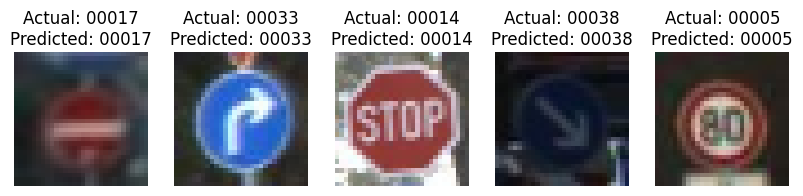

In [16]:
def display_test_images(test_dataset, model, class_names, num_images=5):
    # Take one batch from the dataset
    for images, labels in test_dataset.take(1):
        predictions = model.predict(images)
        predicted_classes = np.argmax(predictions, axis=1)
        
        # Display the first 'num_images' images, predictions, and truths from the batch
        plt.figure(figsize=(10, 10))
        for i in range(num_images):
            plt.subplot(1, num_images, i+1)
            plt.imshow(images[i].numpy().astype("uint8"))
            actual_label = class_names[np.argmax(labels[i])]
            predicted_label = class_names[predicted_classes[i]]
            plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}")
            plt.axis('off')
        plt.show()

display_test_images(test_data, model, class_names, num_images=5)

In [17]:
# Convert the model to the TensorFlow Lite format with quantization
converter = lite.TFLiteConverter.from_keras_model(model)
converter.target_spec.supported_ops = [lite.OpsSet.TFLITE_BUILTINS, lite.OpsSet.SELECT_TF_OPS]

# Generate a quantized model
tflite_model = converter.convert()

# Save the quantized model to a file
with open(quantized_model_path, 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpsxrkn4qs/assets


INFO:tensorflow:Assets written to: /tmp/tmpsxrkn4qs/assets
2024-02-29 20:45:50.567370: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-02-29 20:45:50.567381: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-02-29 20:45:50.567517: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpsxrkn4qs
2024-02-29 20:45:50.568100: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-02-29 20:45:50.568104: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /tmp/tmpsxrkn4qs
2024-02-29 20:45:50.569575: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2024-02-29 20:45:50.570029: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2024-02-29 20:45:50.594903: I tensorflow/cc/saved_model/loader.cc:217] Running initializatio

In [18]:
# Get the size of the model
model_size = os.path.getsize(quantized_model_path)

# Convert size to more readable format (e.g., in MB)
model_size_mb = model_size / (1024 * 1024)

print(f"Quantized Model size: {model_size} bytes, or {model_size_mb:.2f} MB")

Quantized Model size: 1709288 bytes, or 1.63 MB


In [32]:
# Load the TFLite model and allocate tensors (memory for the model's tensors)
interpreter = Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Get input and output tensors information from the model
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Function to normalize and resize images in the dataset
def preprocess_image(image, label):
    # Resize images if necessary. This example assumes the model expects 28x28x1 inputs.
    # If your model uses a different input size or RGB images, adjust the target size and number of channels here.
    image = tf_image.resize(image, [30, 30])
    image = tf_cast(image, tf.float32) / 255.0
    return image, label

# Apply the preprocessing function to the dataset
test_data_normalized = test_data.map(preprocess_image)

# Initialize an empty list to store predicted classes for each image
predicted_classes = []

# TensorFlow datasets are designed to handle batches of data.
# Since we're using TensorFlow Lite which expects one item at a time (for simplicity in this example),
# we'll process each item individually.
for images, labels in test_data_normalized.unbatch().batch(1).take(-1):  # Process all images individually
    # Convert the TensorFlow tensor to a numpy array
    image_np = images.numpy()
    
    # Set the value of the input tensor
    interpreter.set_tensor(input_details[0]['index'], image_np)
    
    # Run the inference
    interpreter.invoke()
    
    # Get the prediction results for the current image
    predictions = interpreter.get_tensor(output_details[0]['index'])
    predicted_class = np.argmax(predictions)
    
    # Append the predicted class to the list of predicted classes
    predicted_classes.append(predicted_class)

1/1 [==============================] - 0s 8ms/step


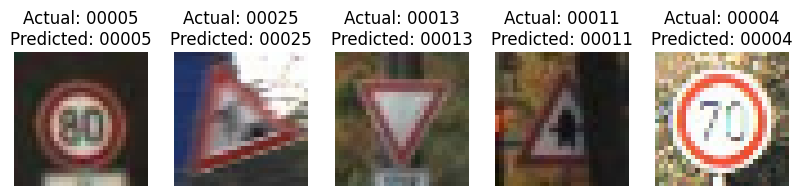

In [33]:
def display_test_images(test_dataset, tflite_model, class_names, num_images=5):
    # Take one batch from the dataset
    for images, labels in test_dataset.take(1):
        predictions = model.predict(images)
        predicted_classes = np.argmax(predictions, axis=1)
        
        # Display the first 'num_images' images, predictions, and truths from the batch
        plt.figure(figsize=(10, 10))
        for i in range(num_images):
            plt.subplot(1, num_images, i+1)
            plt.imshow(images[i].numpy().astype("uint8"))
            actual_label = class_names[np.argmax(labels[i])]
            predicted_label = class_names[predicted_classes[i]]
            plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}")
            plt.axis('off')
        plt.show()

display_test_images(test_data, model, class_names, num_images=5)